a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Q3.csv")
df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


b.

In [3]:
# Check for missing values

missing_values = pd.DataFrame({'missing value count': df.isna().sum()})
missing_values

,missing value count
track_id,0
disc_number,0
duration_ms,0
explicit,0
track_name,0
track_name_farsi,10020
artist_name,0
artist_name_farsi,0
popularity,9701
track_number,0


In [4]:
# dropping key_name tuples
missing_tuples = df[df.key_name.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

# dropping key_mode tuples
missing_tuples = df[df.key_mode.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

# dropping mode_name tuples
missing_tuples = df[df.mode_name.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

In [5]:
# Dropping track_name_farsi, album_href, popularity and album_total_tracks columns

df.drop(columns=['album_href', 'track_name_farsi', 'popularity', 'album_total_tracks'], inplace=True)

c.

In [6]:
# Dropping album_id, album_href, track_id and track_href columns

df.drop(columns=['album_id', 'track_id', 'track_href'], inplace=True)

In [7]:
#Converting duration_ms(milliseocnds to seconds)

df['duration_ms'] = df['duration_ms']/1000

In [8]:
categorical_features = list(df.select_dtypes(include=['object', 'bool']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,disc_number,duration_ms,explicit,track_name,artist_name,artist_name_farsi,track_number,album_name,album_release_date,album_release_year,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,1,446.88,0,2706,58,24,1,1945,1543,2020,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,3,1,7
1,1,851.92,0,593,58,24,2,1945,1543,2020,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,8,0,16
2,1,293.16,0,6484,58,24,3,1945,1543,2020,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,8,1,17
3,1,648.72,0,4469,58,24,4,1945,1543,2020,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,5,1,11
4,1,273.48,0,1191,58,24,5,1945,1543,2020,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,3,1,7


In [9]:
def year_to_decade(year):
    decade = (year//10) * 10
    return decade

df['decade'] = df['album_release_year'].apply(lambda x: year_to_decade(x))

d.

In [10]:
df.describe()

,disc_number,duration_ms,explicit,track_name,artist_name,artist_name_farsi,track_number,album_name,album_release_date,album_release_year,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,decade
count,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,...,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000
mean,1.070080,287.975313,0.002002,3701.980740,34.884058,33.586575,5.593154,1043.473875,578.168764,2008.895976,...,0.608152,0.127699,0.192016,0.450016,119.300558,3.668097,5.106598,0.626144,10.839340,2003.926392
std,0.388827,169.926950,0.044704,2156.224016,20.140734,18.018821,4.544148,617.791304,458.752226,8.726050,...,0.318153,0.284614,0.153368,0.239323,29.792370,0.638073,3.442714,0.483849,6.856081,8.563848
min,1.000000,3.996000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1974.000000,...,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,1.000000,203.440000,0.000000,1867.000000,15.000000,17.000000,2.000000,492.000000,191.000000,2005.000000,...,0.328000,0.000000,0.095600,0.255000,95.083000,3.000000,2.000000,0.000000,5.000000,2000.000000
50%,1.000000,252.988500,0.000000,3690.000000,38.000000,33.000000,5.000000,1092.000000,387.000000,2011.000000,...,0.722000,0.000086,0.132000,0.419000,120.054000,4.000000,5.000000,1.000000,10.000000,2010.000000
75%,1.000000,331.840000,0.000000,5533.250000,53.000000,50.000000,8.000000,1600.000000,973.000000,2016.000000,...,0.881000,0.014200,0.247000,0.633000,138.008250,4.000000,8.000000,1.000000,17.000000,2010.000000
max,4.000000,3978.450000,1.000000,7552.000000,68.000000,68.000000,32.000000,2072.000000,1571.000000,2020.000000,...,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000,11.000000,1.000000,23.000000,2020.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10488 entries, 0 to 10630
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   disc_number         10488 non-null  int64  
 1   duration_ms         10488 non-null  float64
 2   explicit            10488 non-null  int64  
 3   track_name          10488 non-null  int32  
 4   artist_name         10488 non-null  int32  
 5   artist_name_farsi   10488 non-null  int32  
 6   track_number        10488 non-null  int64  
 7   album_name          10488 non-null  int32  
 8   album_release_date  10488 non-null  int32  
 9   album_release_year  10488 non-null  int64  
 10  danceability        10488 non-null  float64
 11  energy              10488 non-null  float64
 12  key                 10488 non-null  int64  
 13  loudness            10488 non-null  float64
 14  mode                10488 non-null  int64  
 15  speechiness         10488 non-null  float64
 16  acou

In [12]:
df.shape

(10488, 26)

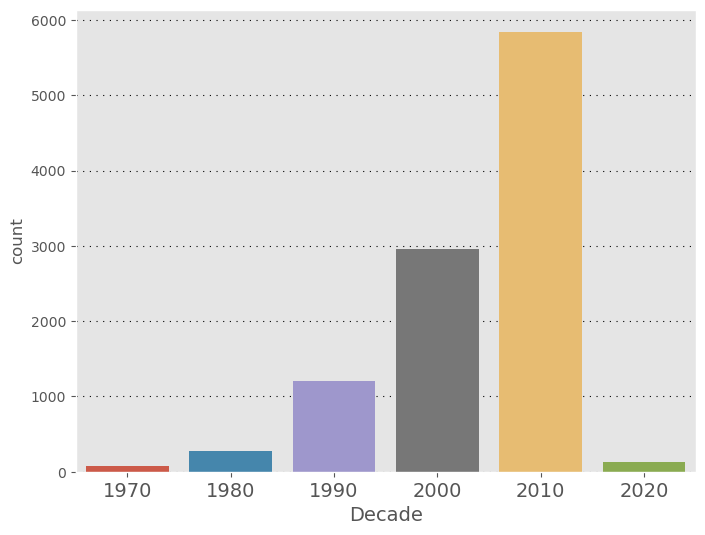

In [50]:
fig = plt.figure(figsize = (8, 6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(data = df, x ='decade', alpha = 1, zorder = 2)
ax.set_xlabel('Decade', fontsize = 14)
ax.tick_params(axis = 'x', labelsize=14)
plt.show()

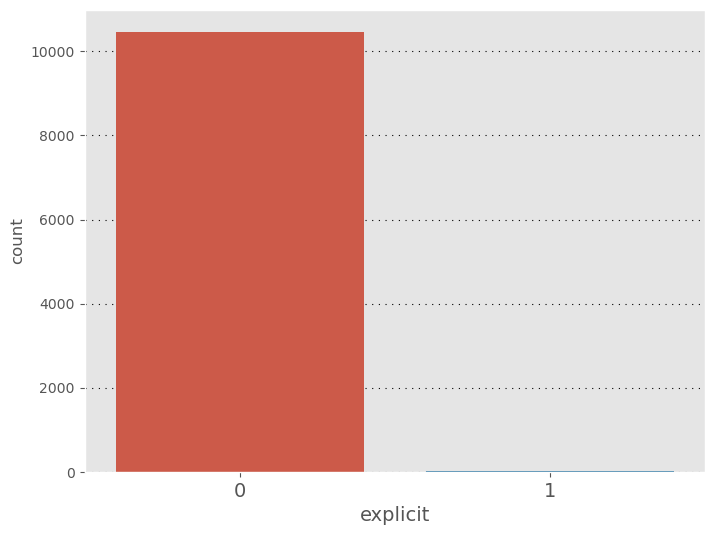

In [51]:
fig = plt.figure(figsize = (8, 6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(data = df, x ='explicit', alpha = 1, zorder = 2)
ax.set_xlabel('explicit', fontsize = 14)
ax.tick_params(axis = 'x', labelsize=14)
plt.show()

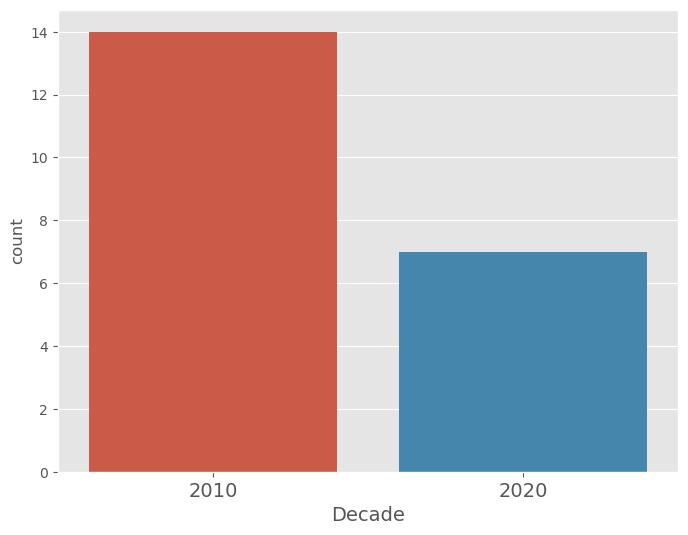

In [52]:
explicit_tracks = df[df['explicit']==1]
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.countplot(x = 'decade', data = explicit_tracks, zorder=2, alpha=1)
ax.set_xlabel('Decade', fontsize = 14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

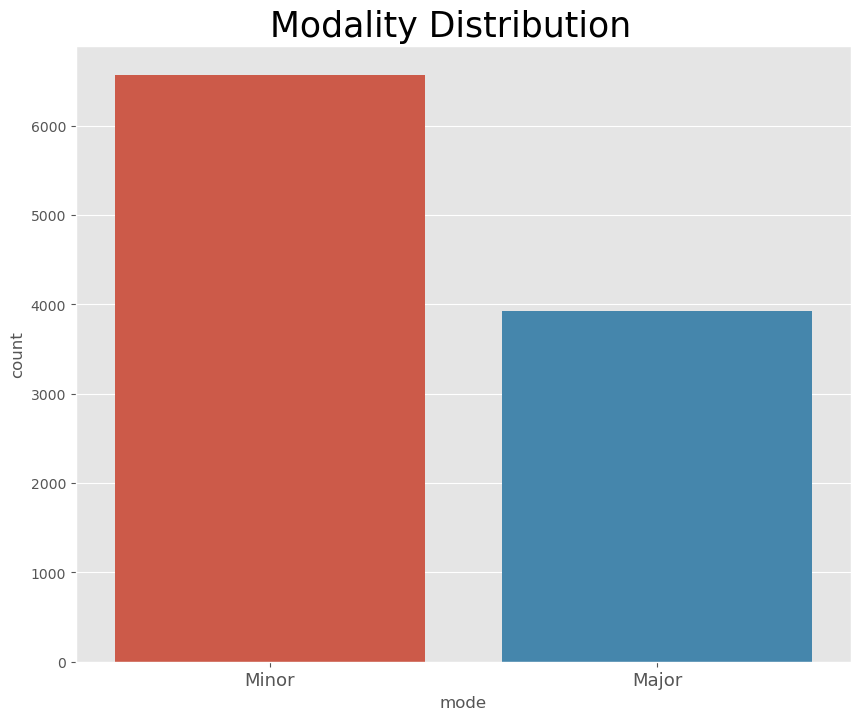

In [53]:
fig = plt.figure(figsize=(10, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 7000, 'Modality Distribution', fontsize=25)
sns.countplot(x = 'mode', data = df, zorder=2, alpha=1)
ax.set_xticklabels(['Minor', 'Major'], fontsize=13)
plt.show()

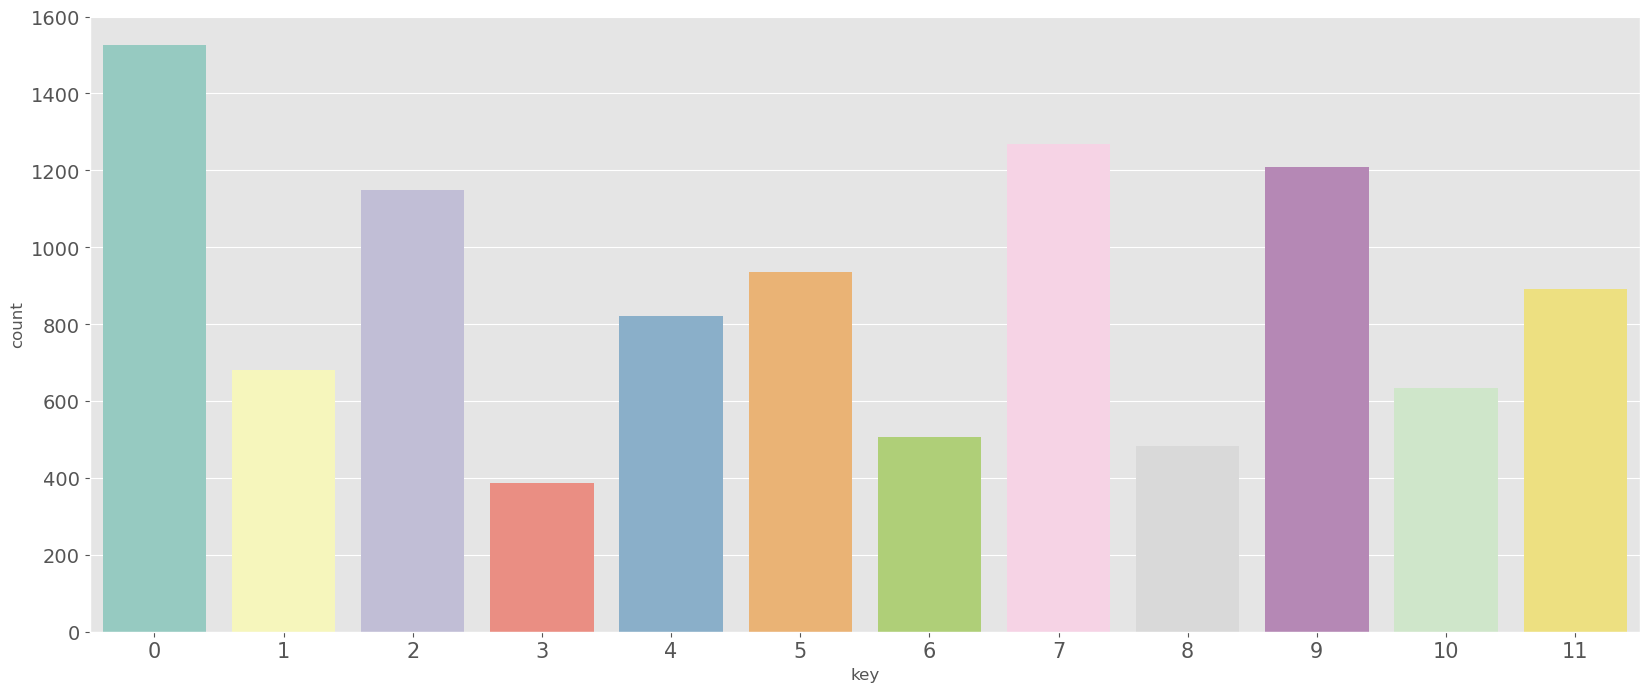

In [54]:
fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.countplot(x = 'key', data = df, zorder=2, alpha=1, palette='Set3')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=15)
plt.show()

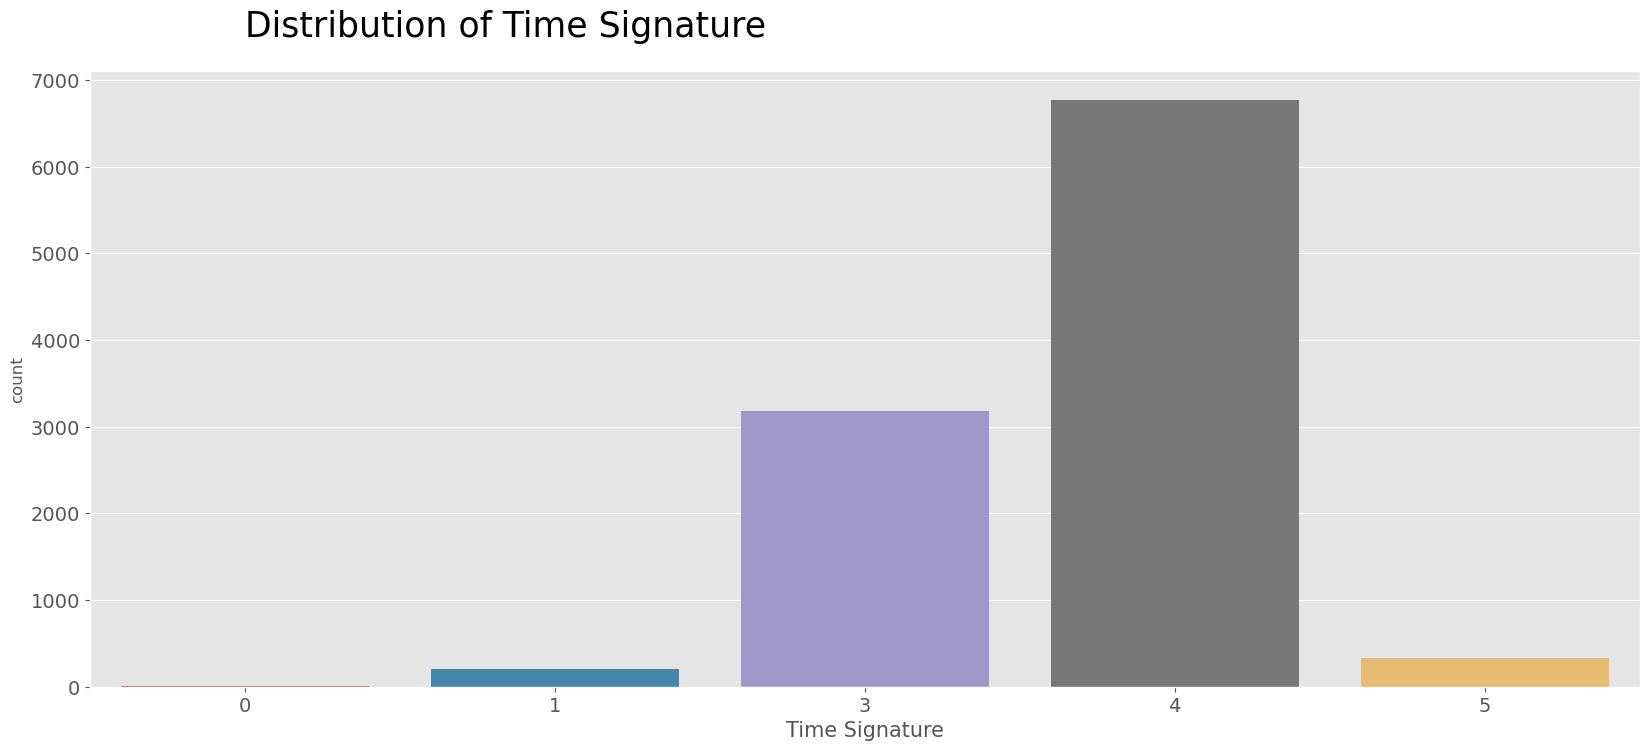

In [55]:
fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 7500, 'Distribution of Time Signature', fontsize=25)
sns.countplot(x = 'time_signature', data = df, zorder=2, alpha=1)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_xlabel('Time Signature',fontsize=15)
plt.show()

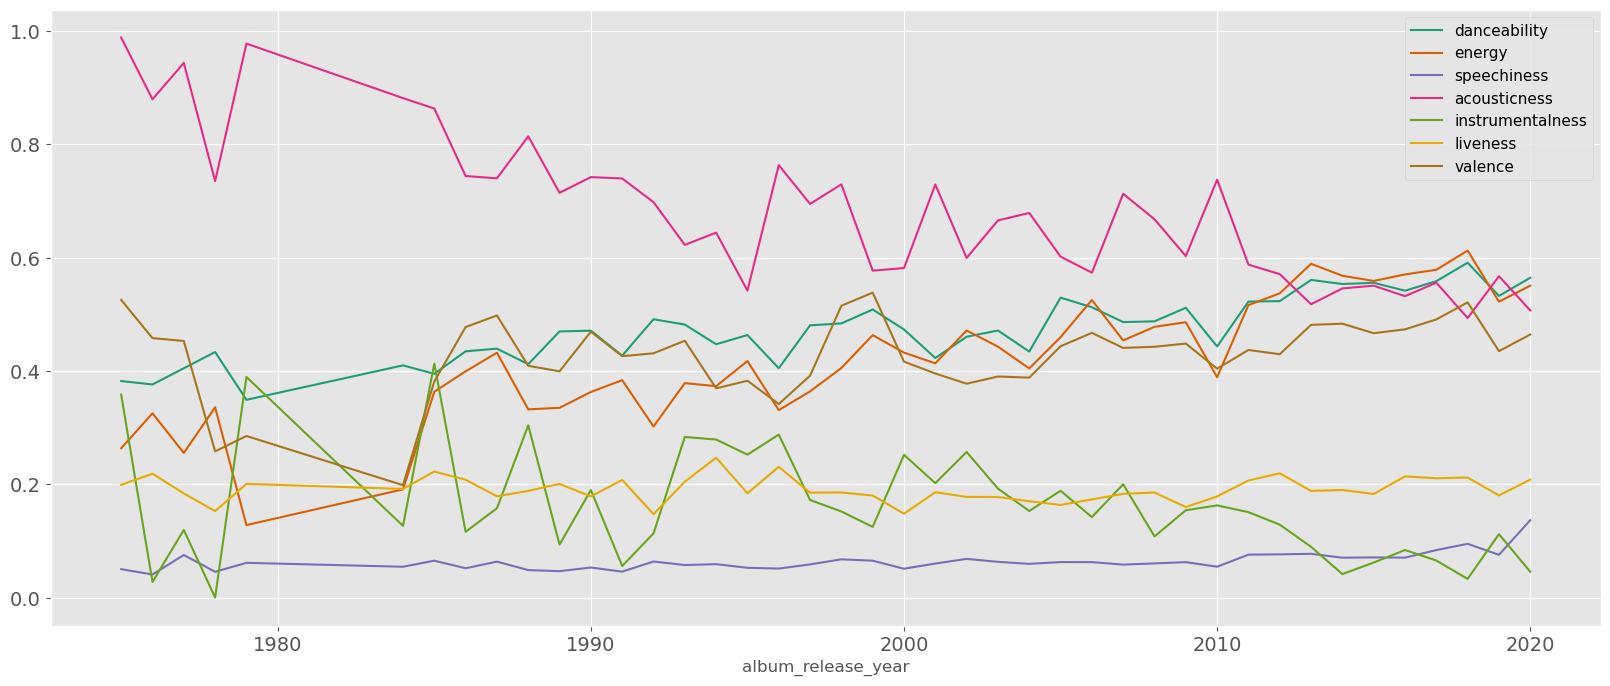

In [56]:
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence']

colormap = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

audio_data = pd.DataFrame(df.groupby('album_release_year')[audio_features].mean())

fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

for feature, color in zip(audio_features, colormap):
    sns.lineplot(data=audio_data.iloc[1:, ], x='album_release_year', y=feature, color=color, ax=ax)
    
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_ylabel('')
ax.legend(audio_features, fontsize=11)
plt.show()

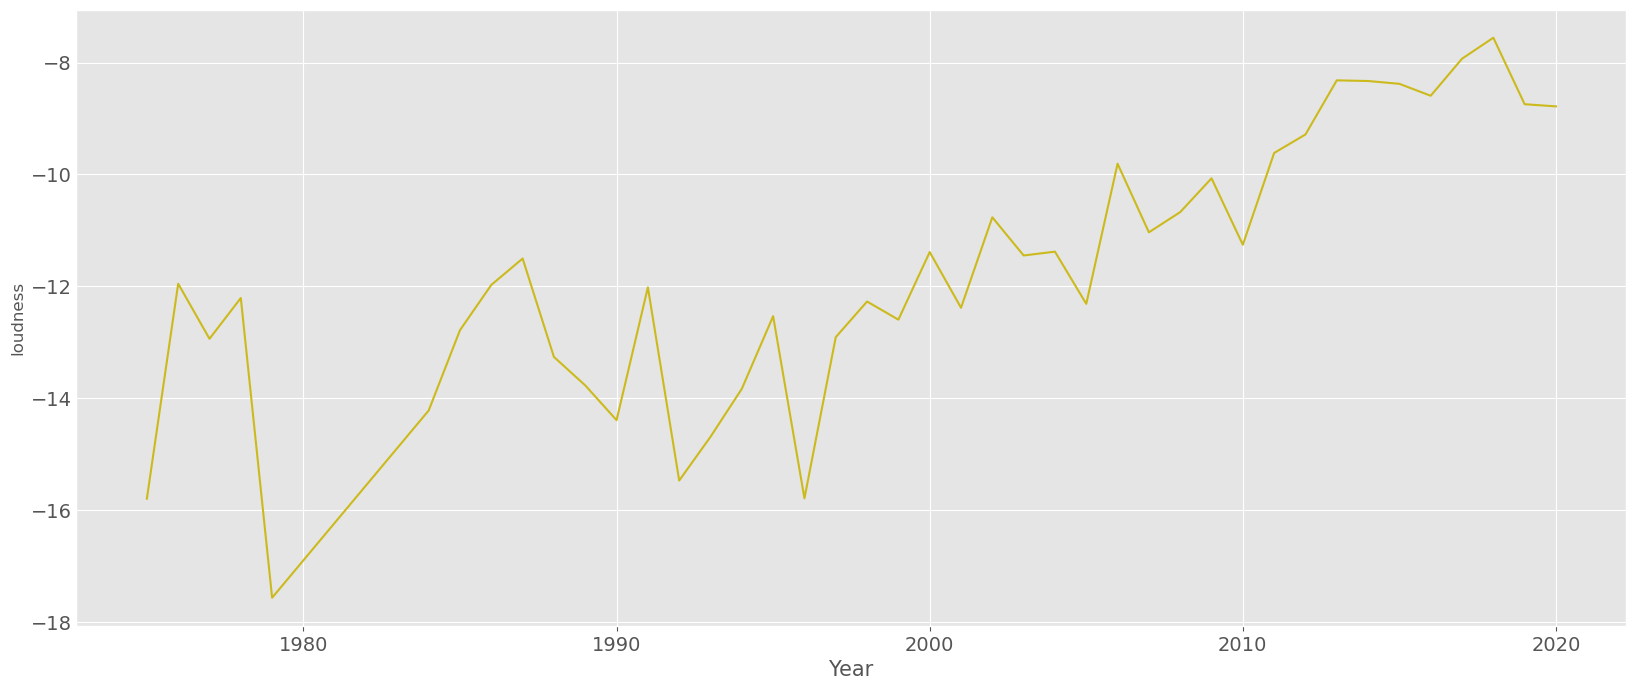

In [57]:
loudness_data = pd.DataFrame(df.groupby('album_release_year')['loudness'].mean())

fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.lineplot(x='album_release_year', y='loudness', data=loudness_data.iloc[1:,], ax=ax, color='#ccba1d')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis = 'y', length=0)  
ax.set_xlabel('Year', fontsize=15)
plt.show()

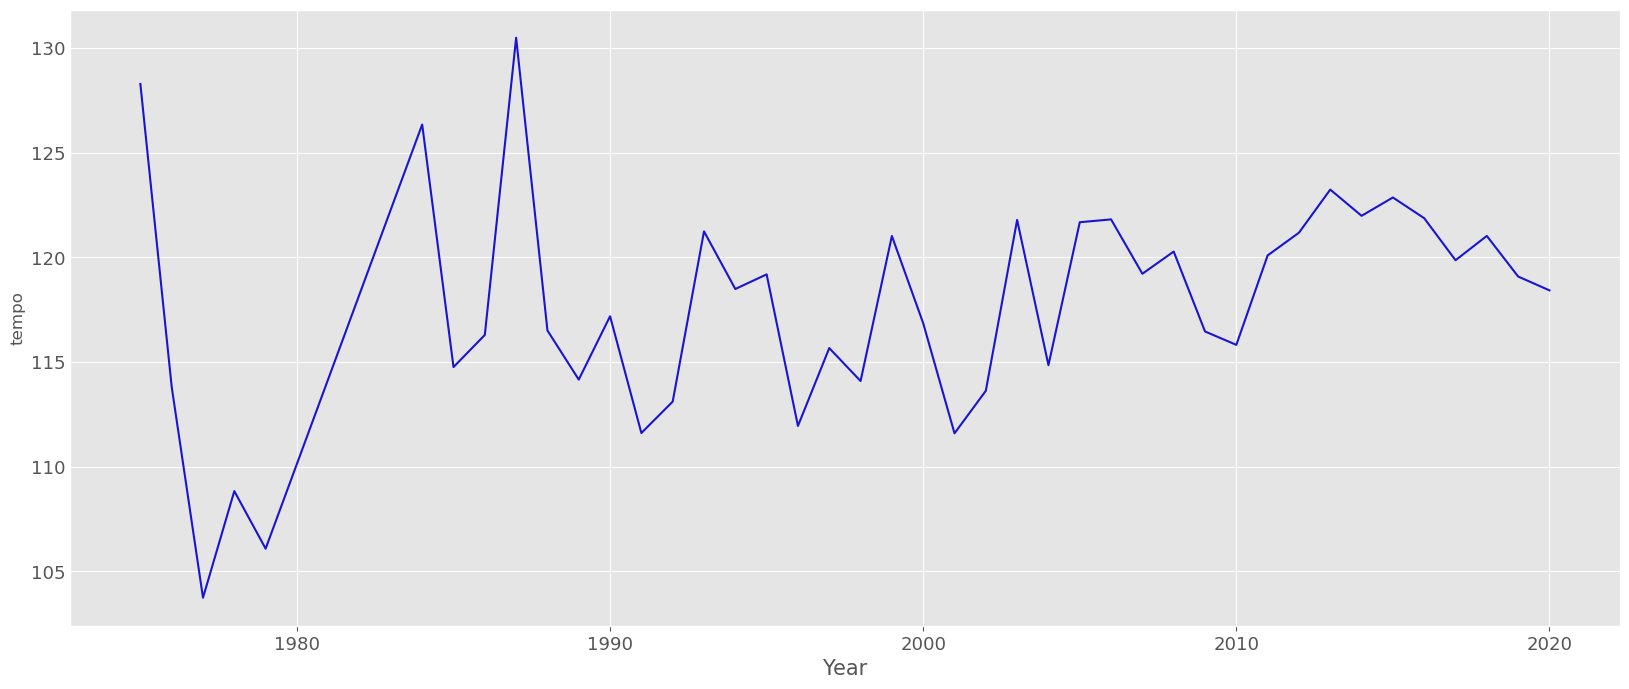

In [58]:
tempo_data = pd.DataFrame(df.groupby('album_release_year')['tempo'].mean())
fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.lineplot(x='album_release_year', y='tempo', data=tempo_data.iloc[1:, ], ax=ax, color='#1815d1')
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis = 'y', length=0)  
ax.set_xlabel('Year', fontsize=15)
plt.show()

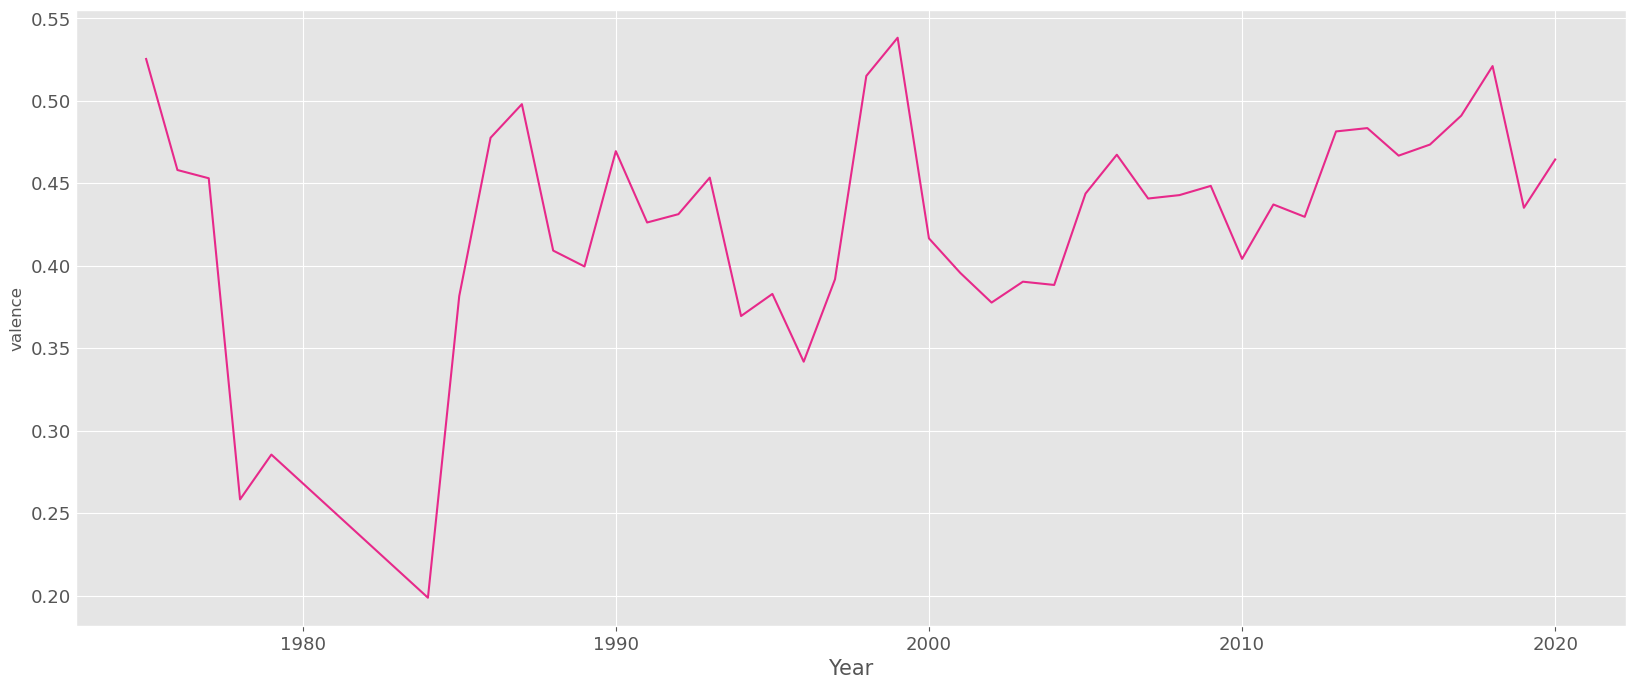

In [59]:
tempo_data = pd.DataFrame(df.groupby('album_release_year')['valence'].mean())
fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.lineplot(x='album_release_year', y='valence', data=tempo_data.iloc[1:, ], ax=ax, color='#e7298a')
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis = 'y', length=0)  
ax.set_xlabel('Year', fontsize=15)
plt.show()

e.

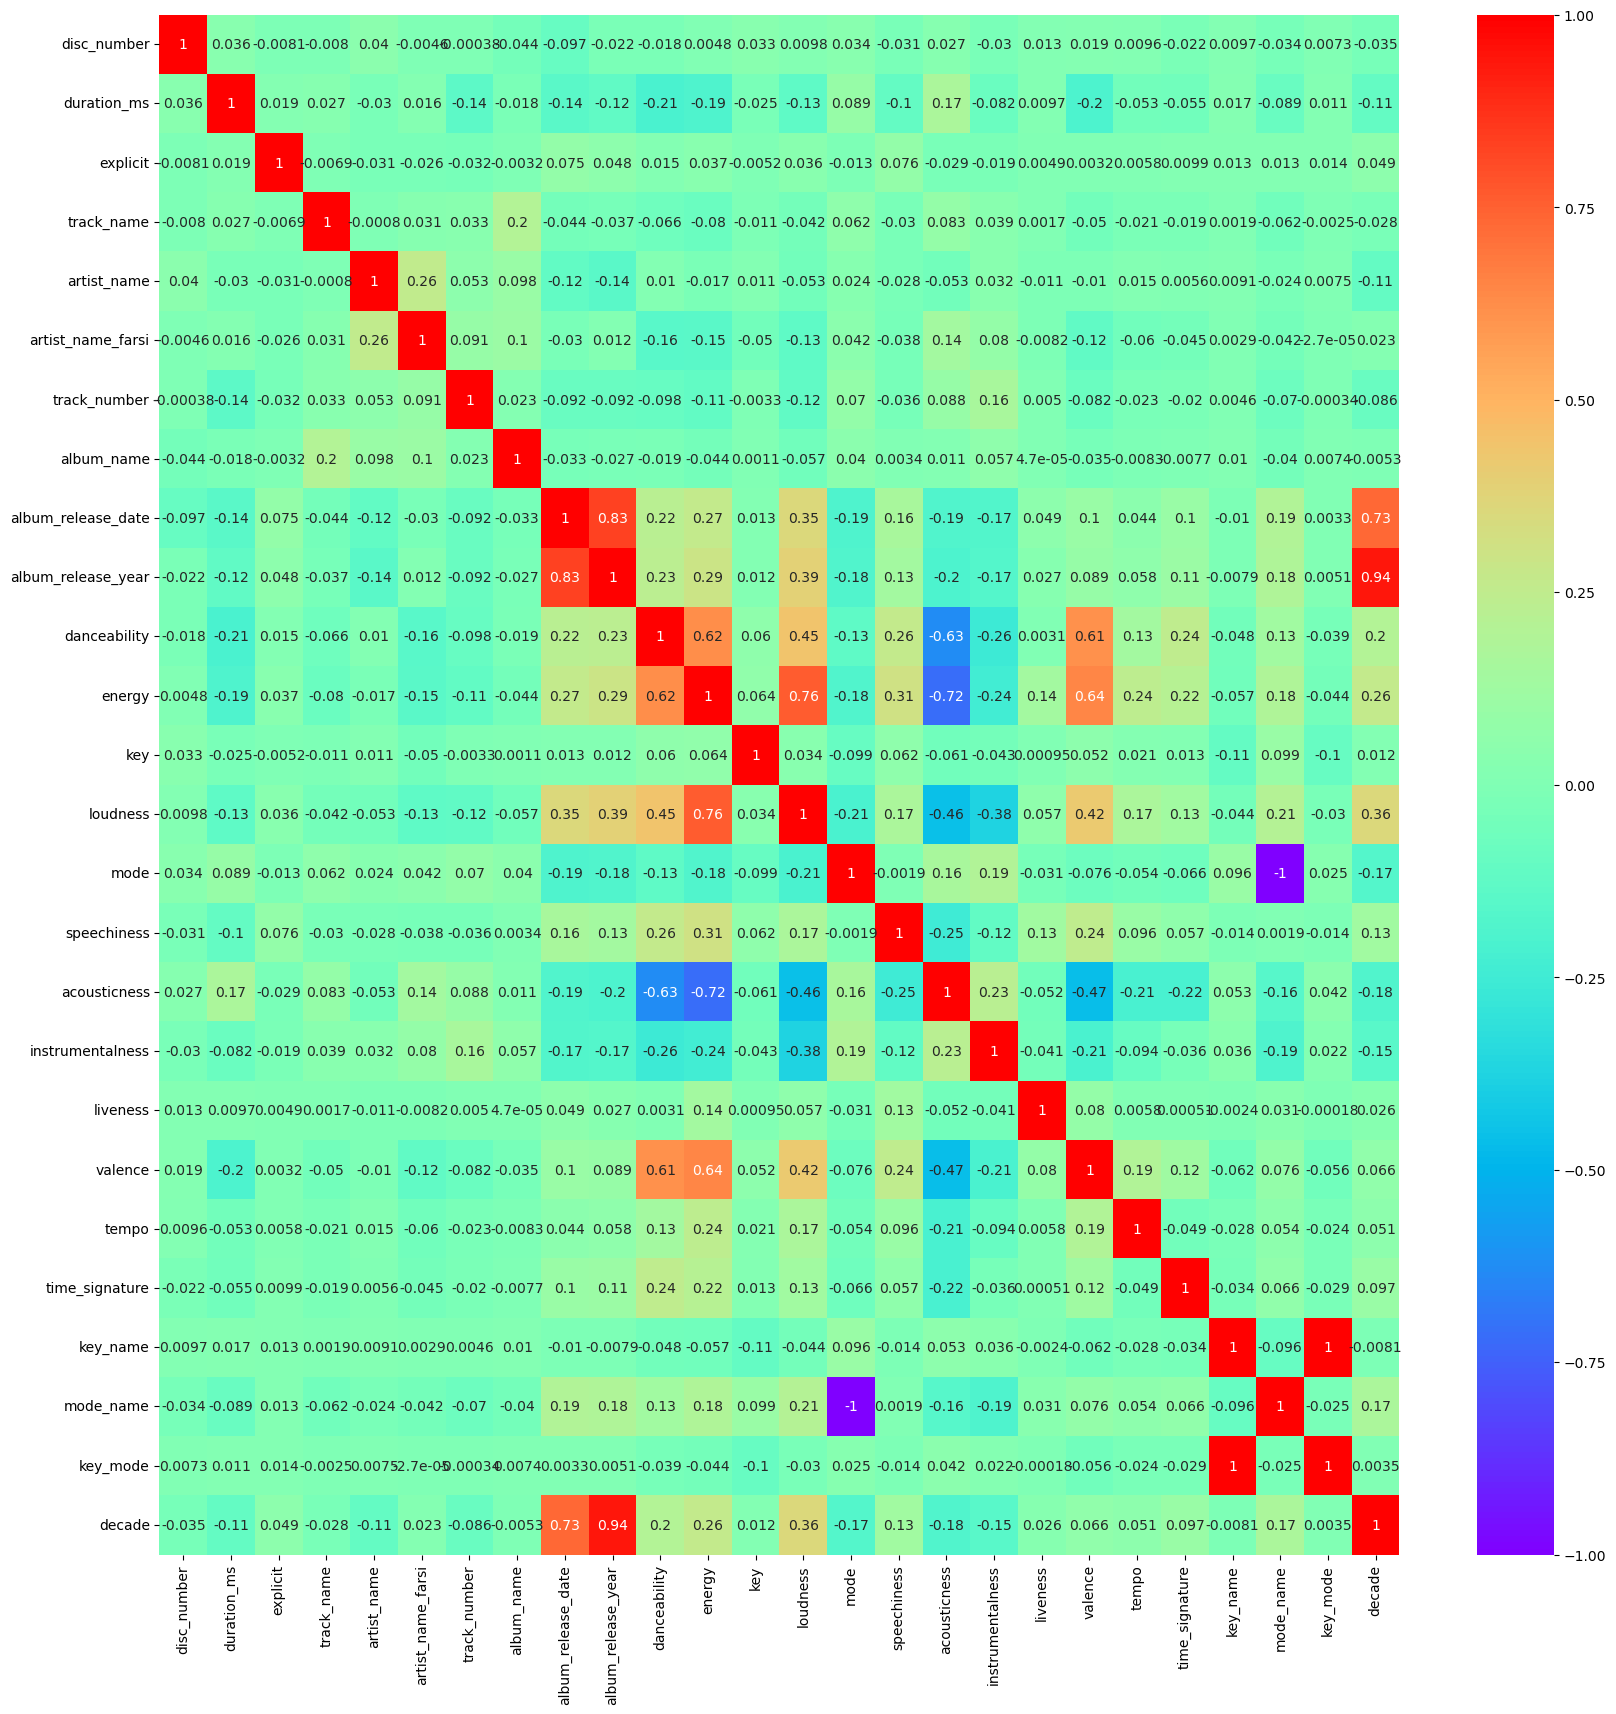

In [23]:
# Correlation Matrix

correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[corr_features].corr(),annot=True,cmap='rainbow')
plt.show()

f.

In [24]:
# Shuffling the Data Set

df = shuffle(df)

In [25]:
X = df.drop("energy", axis=1)
X.head()

,disc_number,duration_ms,explicit,track_name,artist_name,artist_name_farsi,track_number,album_name,album_release_date,album_release_year,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,decade
9278,1,266.858,0,2909,28,61,7,1886,1083,2017,...,0.547,0.00108,0.4920,0.182,93.154,3,5,1,11,2010
7476,1,194.866,0,2580,62,29,10,1720,116,1998,...,0.864,0.81700,0.0777,0.796,126.632,4,7,1,15,1990
577,1,230.107,0,6329,50,50,1,1823,486,2012,...,0.883,0.00000,0.1100,0.515,127.983,4,11,0,22,2010
6257,1,200.120,0,6262,38,44,16,1248,1210,2017,...,0.497,0.00000,0.1050,0.288,125.978,4,5,1,11,2010
5104,1,185.466,0,1396,53,63,3,1113,137,2000,...,0.748,0.61400,0.1400,0.779,144.306,4,8,0,16,2000


In [26]:
y = df["energy"]
y.head()

9278    0.346
7476    0.509
577     0.508
6257    0.486
5104    0.618
Name: energy, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=98)

In [28]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((8390, 25), (2098, 25))

In [29]:
# Feature scaling

X_train.describe()

,disc_number,duration_ms,explicit,track_name,artist_name,artist_name_farsi,track_number,album_name,album_release_date,album_release_year,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,decade
count,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,...,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.00000,8390.000000,8390.000000,8390.000000,8390.000000
mean,1.074493,288.803811,0.001788,3721.588439,34.920739,33.558880,5.562932,1047.780215,578.576758,2008.933969,...,0.609015,0.127995,0.190804,0.450586,119.447781,3.66317,5.100834,0.625864,10.827533,2003.955900
std,0.401814,173.671019,0.042248,2161.423305,20.135843,18.066045,4.510201,619.863276,458.291048,8.684270,...,0.318237,0.284283,0.152071,0.239784,29.780412,0.63888,3.451393,0.483928,6.869884,8.548235
min,1.000000,3.996000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1974.000000,...,0.000022,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1970.000000
25%,1.000000,203.526500,0.000000,1874.250000,15.000000,17.000000,2.000000,494.000000,195.000000,2005.000000,...,0.328250,0.000000,0.095500,0.257000,95.146250,3.00000,2.000000,0.000000,5.000000,2000.000000
50%,1.000000,252.964500,0.000000,3715.500000,38.000000,33.000000,5.000000,1093.000000,387.000000,2011.000000,...,0.726000,0.000081,0.132000,0.418000,120.180500,4.00000,5.000000,1.000000,10.000000,2010.000000
75%,1.000000,332.703000,0.000000,5548.750000,53.000000,50.000000,8.000000,1607.500000,973.000000,2016.000000,...,0.881000,0.015300,0.246000,0.634000,138.031250,4.00000,8.000000,1.000000,17.000000,2010.000000
max,4.000000,3978.450000,1.000000,7552.000000,68.000000,68.000000,31.000000,2072.000000,1571.000000,2020.000000,...,0.996000,0.995000,0.992000,0.980000,219.389000,5.00000,11.000000,1.000000,23.000000,2020.000000


In [30]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

g.

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
LinearRegressionScore = lr.score(X_test,y_test)
LinearRegressionScore

0.8235953897933459

In [32]:
# Check for overfitting and underfitting

print("score on train data: ", lr.score(X_train, y_train))
print("score on test data: ", lr.score(X_test, y_test))

score on train data:  0.8295878636573464
score on test data:  0.8235953897933459


In [33]:
# Discretization process

y_pred_test_disc = pd.qcut(y_pred_test, q=4, precision=0, labels=False)
y_test_disc = pd.qcut(y_test, q=4, precision=0, labels=False)

<AxesSubplot:>

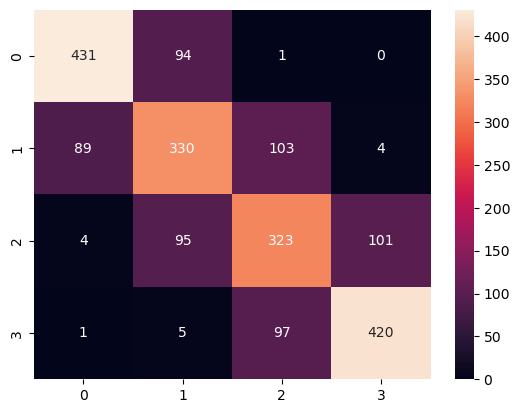

In [34]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test_disc, y_pred_test_disc)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [35]:
print(classification_report(y_test_disc, y_pred_test_disc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       526
           1       0.63      0.63      0.63       526
           2       0.62      0.62      0.62       523
           3       0.80      0.80      0.80       523

    accuracy                           0.72      2098
   macro avg       0.72      0.72      0.72      2098
weighted avg       0.72      0.72      0.72      2098



In [36]:
precision_recall_fscore_support(y_test_disc, y_pred_test_disc, average='micro')

(0.7168732125834127, 0.7168732125834127, 0.7168732125834127, None)

In [37]:
print('Mean Absolute Error: %0.15f' % metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error: %0.30f' % metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error: %0.15f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.079233430960367
Mean Squared Error: 0.010514384734059065151789980064
Root Mean Squared Error: 0.102539673951398


In [38]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(60, 50), activation = 'tanh', solver='adam', random_state=98)
mlp_reg.fit(X_train, y_train)
ypred = mlp_reg.predict(X_test)
MLPRegressorScore = mlp_reg.score(X_test, y_test)
MLPRegressorScore

0.8487496362883175

In [39]:
# Check for overfitting and underfitting

predictions_train = mlp_reg.predict(X_train)
train_score = mlp_reg.score(X_train, y_train)
print("score on train data: ", train_score)
predictions_test = mlp_reg.predict(X_test)
test_score = mlp_reg.score(X_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.8702649564454867
score on test data:  0.8487496362883175


In [40]:
# Discretization process

y_pred_test_disc = pd.qcut(ypred, q=4, precision=0, labels=False)
y_test_disc = pd.qcut(y_test, q=4, precision=0, labels=False)

<AxesSubplot:>

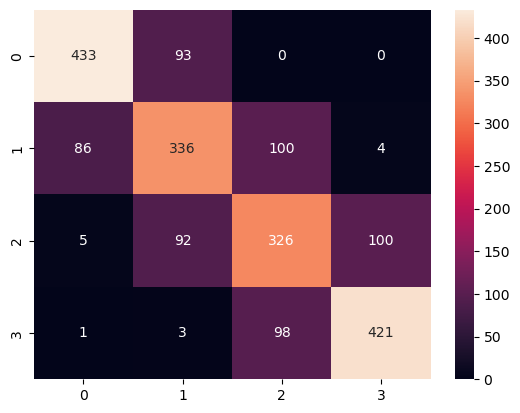

In [41]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test_disc, y_pred_test_disc)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [42]:
print(classification_report(y_test_disc, y_pred_test_disc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       526
           1       0.64      0.64      0.64       526
           2       0.62      0.62      0.62       523
           3       0.80      0.80      0.80       523

    accuracy                           0.72      2098
   macro avg       0.72      0.72      0.72      2098
weighted avg       0.72      0.72      0.72      2098



In [43]:
precision_recall_fscore_support(y_test_disc, y_pred_test_disc, average='micro')

(0.7225929456625357, 0.7225929456625357, 0.7225929456625356, None)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.0726400411212166
Mean Squared Error: 0.009015096109835164
Root Mean Squared Error: 0.09494785995395137


In [45]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
df_temp.head()

,Actual,Predicted
468,0.961,0.851710
10014,0.812,0.865802
10133,0.690,0.600766
5984,0.910,0.793481
3871,0.573,0.633316


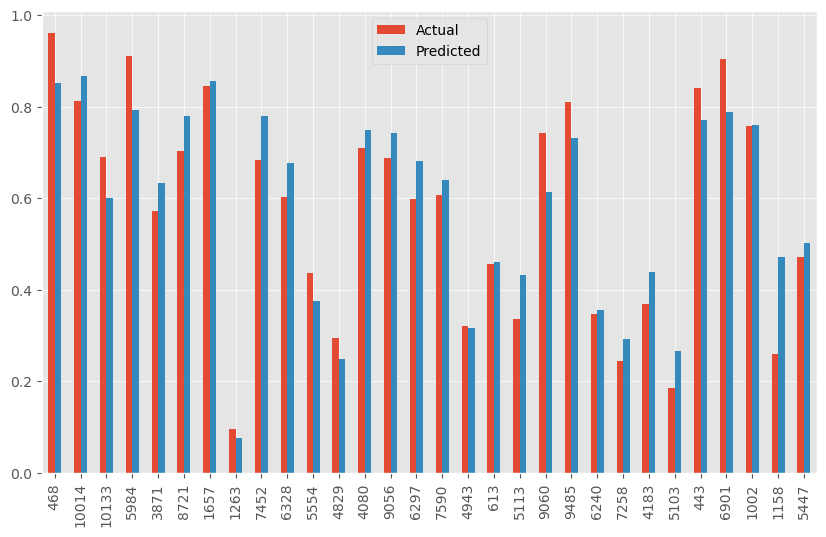

In [49]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

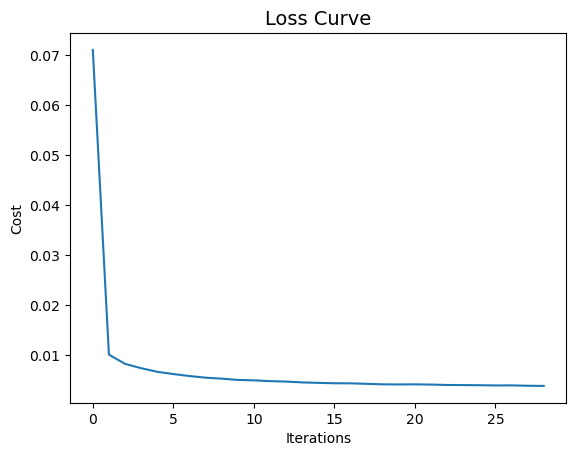

In [47]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Text(0, 0.5, 'Model Accuracy')

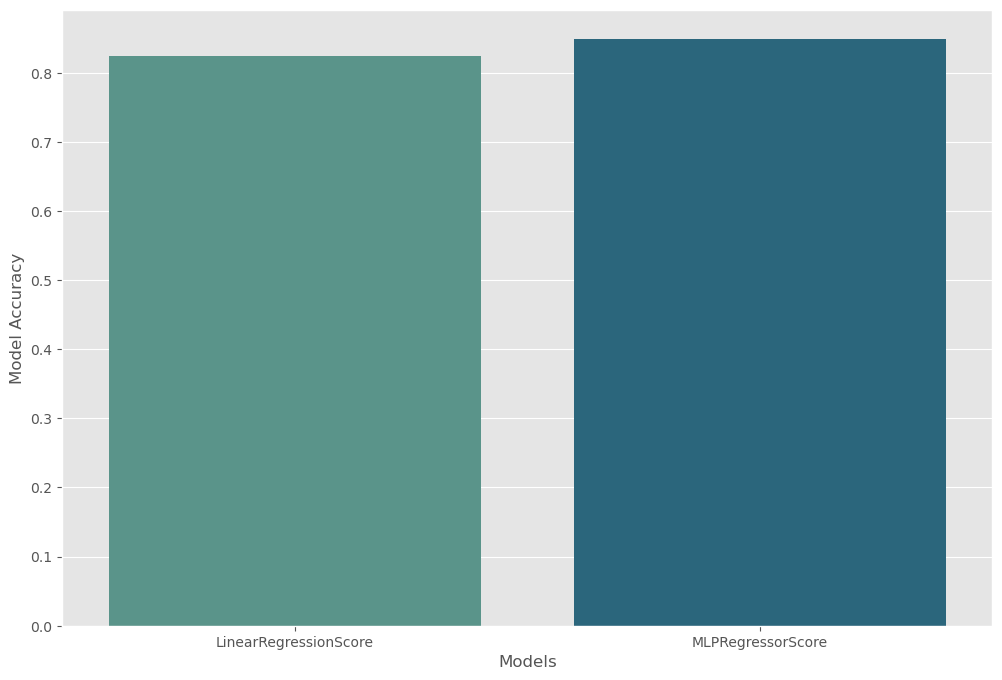

In [48]:
plt.style.use("ggplot")
x = ["LinearRegressionScore", "MLPRegressorScore"]

y = [LinearRegressionScore, MLPRegressorScore]

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")